### This notebook contains worked examples from Chapter 1 of the text *Analytic Combinatorics in Several Variables (2nd edition)* by Pemantle, Wilson and Melczer. 

Further details can be found on the book website at [https://acsvproject.com/acsvbook/](https://acsvproject.com/acsvbook/) .

Example numbers match the published version.


### Example 1.3 - Rates of Decay

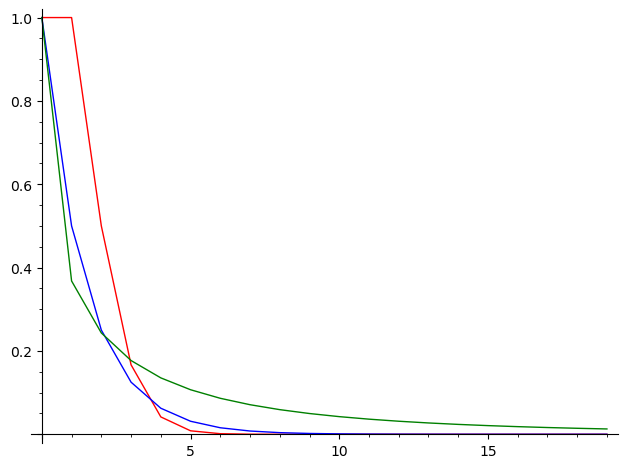

In [1]:
N = 20 # Number of terms to plot
plt = line([(n,1/factorial(n)) for n in range(N)], color='red')
plt = plt + line([(n,2^(-n)) for n in range(N)], color='blue')
plt = plt + line([(n,exp(-sqrt(n))) for n in range(N)], color='green')
show(plt)

### Example 1.4 - Stirling's Formula

In [2]:
asy = asymptotic_expansions.Stirling('n',6)
lead = asy.truncate(1).exact_part()
show("Stirling's approximation begins \t", latex(lead) + "\cdot \left(" + latex(asy/lead) + "\\right)")

"Stirling's approximation begins \t" \sqrt{2} \sqrt{\pi} n^{n} \left(e^{n}\right)^{-1} n^{\frac{1}{2}} \cdot \left( 1 + \frac{1}{12} n^{-1} + \frac{1}{288} n^{-2} - \frac{139}{51840} n^{-3} - \frac{571}{2488320} n^{-4} + O\!\left(n^{-5}\right) \right)

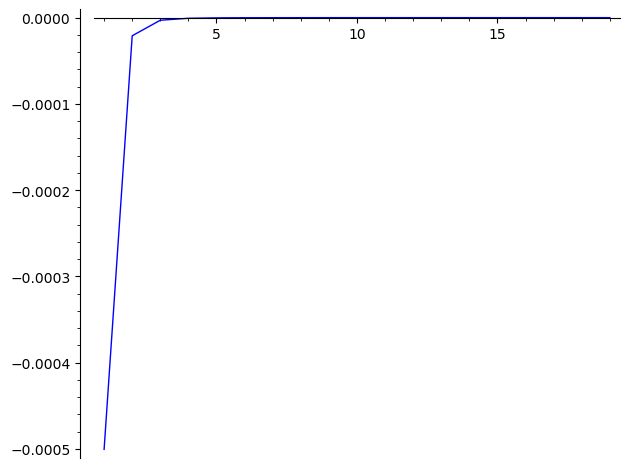

In [3]:
# Plot of the relative error between this approximation and the actual value of the factorial 
N = 20 # Number of terms to plot
plt = line([(k,(asy.exact_part().subs(n=k) - factorial(k))/factorial(k)) for k in srange(1,N)])
plt

### Example 1.7 - Binomial Coefficients

In this chapter we discuss the sequence of binomial coefficients 
$$a_{r,s} = \binom{r+s}{r}$$
using the recursive definition $a_{r,s} = a_{r-1,s} + a_{r,s-1}$, the generating function
$$ F(x,y) = \sum_{r,s \geq 0}a_{r,s}x^ry^s = \frac{1}{1-x-y} $$
and the asymptotic approximation
$$ a_{r,s} \sim \left(\frac{r+s}{r}\right)^r\left(\frac{r+s}{s}\right)^s \sqrt{\frac{r+s}{2\pi rs}}$$ 

In [4]:
# Print starting terms in binomial coefficient sequence
N = 8
show(matrix([[binomial(i+j,i) for i in range(N)] for j in range(N)]))

[   1    1    1    1    1    1    1    1]
[   1    2    3    4    5    6    7    8]
[   1    3    6   10   15   21   28   36]
[   1    4   10   20   35   56   84  120]
[   1    5   15   35   70  126  210  330]
[   1    6   21   56  126  252  462  792]
[   1    7   28   84  210  462  924 1716]
[   1    8   36  120  330  792 1716 3432]

In [5]:
# Compute starting terms in binomial coefficient sequence using recursion 
@cached_function
def rec_a(r,s):
    if (r<0 or s<0):
        return 0
    elif (r==0 or s==0):
        return 1
    else:
        return rec_a(r-1,s) + rec_a(r,s-1)

show(matrix([[rec_a(i,j) for i in range(N)] for j in range(N)]))

[   1    1    1    1    1    1    1    1]
[   1    2    3    4    5    6    7    8]
[   1    3    6   10   15   21   28   36]
[   1    4   10   20   35   56   84  120]
[   1    5   15   35   70  126  210  330]
[   1    6   21   56  126  252  462  792]
[   1    7   28   84  210  462  924 1716]
[   1    8   36  120  330  792 1716 3432]

In [6]:
# Expand claimed generating function and print starting coefficients
var('x y')
F = 1/(1-x-y)
ser = F.taylor((x,0), (y,0), N+1).polynomial(QQ)
show(matrix([[ser[i,j] for i in range(N)] for j in range(N)]))

[   1    1    1    1    1    1    1    1]
[   1    2    3    4    5    6    7    8]
[   1    3    6   10   15   21   28   36]
[   1    4   10   20   35   56   84  120]
[   1    5   15   35   70  126  210  330]
[   1    6   21   56  126  252  462  792]
[   1    7   28   84  210  462  924 1716]
[   1    8   36  120  330  792 1716 3432]

In [7]:
# Plot ratio of binomial coefficients to leading asymptotic 
# Note the ratio goes to 1 along any ray away from the coordinate axes
# (For readability we scale the x and y coordinates to lie in [0,1])
var('r s')
asy = sqrt((r+s)/(2*r*s*pi))*(r+s)^(r+s)/r^r/s^s

N = 40 # Number of terms to plot in each coordinate
pts = [[i/N,j/N,binomial(i+j,i)/asy.subs(r=i,s=j)] for i in range(1,N) for j in range(1,N)]
points(pts, aspect_ratio = [1,1,4])

Graphics3d Object